In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

import pol_model as plm

In [6]:
# Generate some fake data
np.random.seed(0)

# Create a model
m1 = plm.GaussModel(a=1000, theta=pi/3, ratio=0.8)
# Generate data
x, y, m1_data = plm.Model2Data(m1, 0, 200, 50, 150)
# Add noise
m1_data += np.random.normal(0, 10, m1_data.shape)


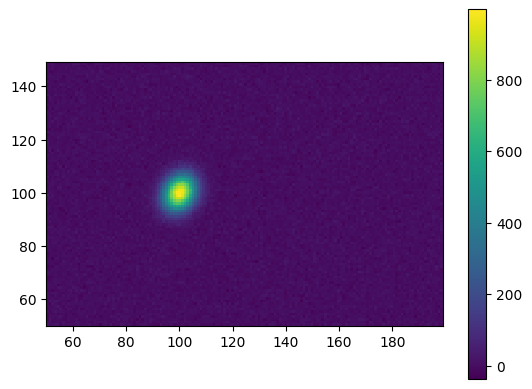

In [7]:

cb = plt.imshow(m1_data, origin='lower', interpolation='nearest',
           extent=(x.min(), x.max(), y.min(), y.max())
           )
plt.colorbar(cb)
# plt.axis('equal')
plt.show()